### 1r PAS:

Descarregar-se el repositori de [GitHib-OpticaProfes](https://github.com/opticaUB/profes). Auest directory li direm `profes_repo`.

### 2n PAS:

Anar al Campus i descarregar-se un Excel amb totes les notes referents al Informes i la Prova Oral.

NOTA: Campus >> curs >> **Qualificacions** >> informe del qualificador >> Exporta >> **Tipus Excel (no libreoffice)** >> Seleccionar tots els items >> Baixa >> Moure arxiu Excel a la carpeta `repo_profes`

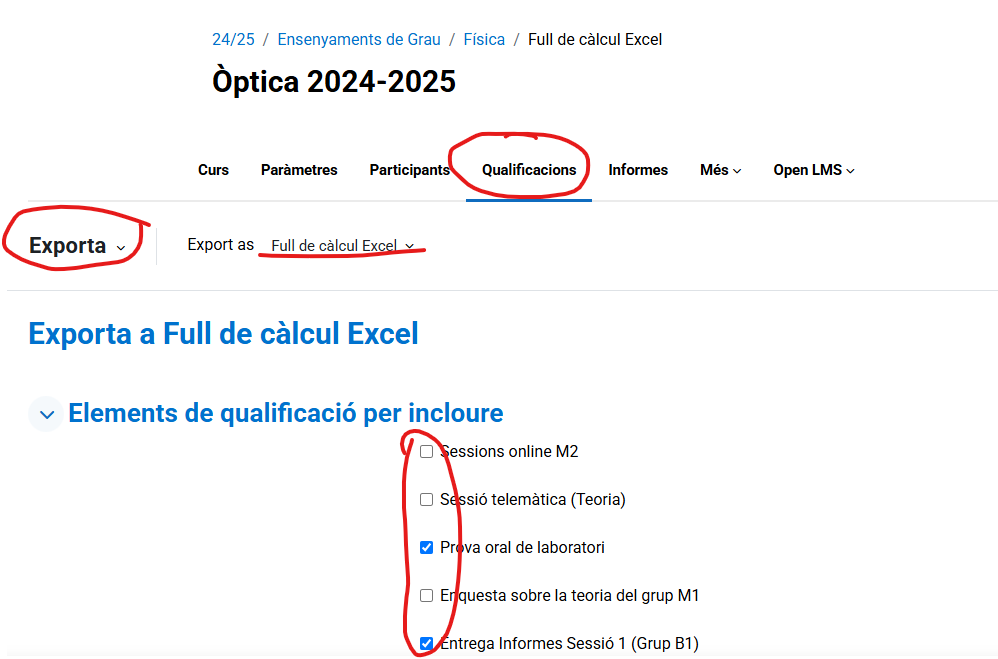


### 3r PAS (Opcional però recomanat):

Anar al Campus i descarregar-se un Excel amb els participants, ja que la fulla de qualificacions no conté una columna amb els grups de teoria...

NOTA: Campus >> curs >> **Participants** >> seleccionar tots >> **Descarregar Excel** >> Moure arxiu Excel a la carpeta `repo_profes`

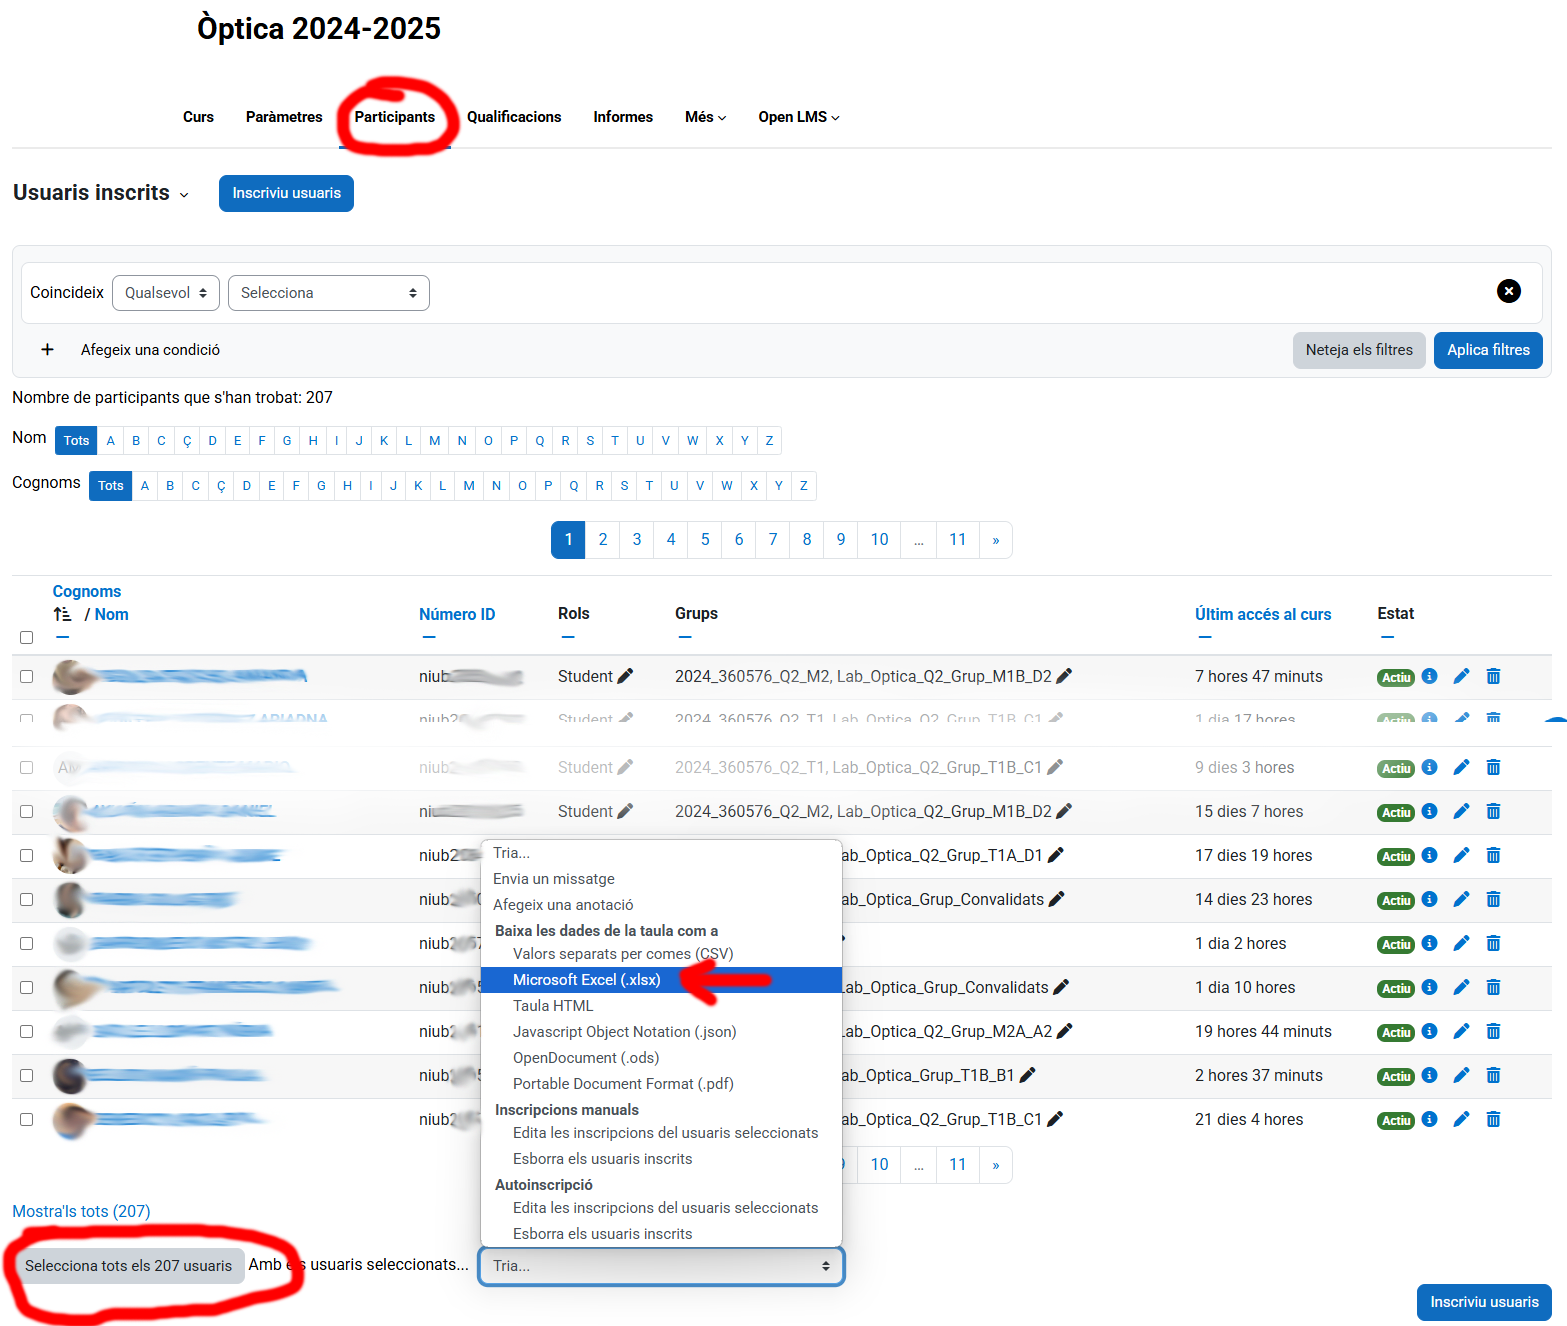

### 3r PAS:

Correr les següents celes de codi


##### Carregar el fitxer descarregat

In [ ]:
from src.unify_CV_columns import load_main, load_part

data0, fn = load_main(pattern="*Qualificacions*.xlsx")
data_part = load_part(pattern="*_participants*.xlsx")

print(f"MAIN Excel: {data0.shape[0]} students with {data0.shape[1]} columns.")
print(f"PART Excel: {data_part.shape[0]} students with {data_part.shape[1]} columns." if data_part is not None else "No participants Excel provided")

##### Unifica les columnes fent mitjanes en els informes i obtenint la nota de la prova oral

In [ ]:
from src.unify_CV_columns import find_grup_teo, unify, reformating, print_summary

data = data0.copy()

data = find_grup_teo(data, data_part)

data = unify(data)

data = reformating(data, keep_AC=False)  # Poseu keep_AC=True per mantenir informació de l'Avaluació Continuada!

print_summary(data)

##### Ho exportem a Excel amb el suffix "_unified"

In [ ]:
from src.unify_CV_columns import export_to_excel

export_to_excel(data, fn)

## S'ha d'EXECUTAR la següent cel·la abans de fer cap commit per tal d'ESBORRAR INFORMACIÓ SENSIBLE

Els outputs d'aquest quadern contenen informació sensible. No passa res mentre no es faci un commit de GIT.

In [ ]:
!jupyter nbconvert --ClearOutputPreprocessor.enabled=True --inplace --clear-output Notes_LAB_from_campus.ipynb